# Food-101 With ResNet50

### 1.Importing packages

In [20]:
import numpy as np 
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator 
from keras.layers import Dropout,GlobalAveragePooling2D,Dropout,Dense
from keras.applications import ResNet50
from keras.layers import Input
from keras.models import Model
from matplotlib import pyplot as plt

### 2.Dataset

#### 2.1 Downloading Dataset

In [11]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2019-05-18 11:31:58--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2019-05-18 11:32:00--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  8.69MB/s    in 10m 0s  

2019-05-18 11:42:01 (7.94 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [12]:
!tar xzf food-101.tar.gz

#### 2.2 Dataset Description

The data set consists of 101 food categories, with 101,000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. The training images were not cleaned, and thus still contain some amount of noise.All images were rescaled to have a maximum side length of 512 pixels.



In [13]:
train_path='./food-101/images'
test_path='./food-101/images'
dimentions=(128,128)
batch_size=16
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=dimentions,
    batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
    test_path, 
    target_size=dimentions,
    batch_size=batch_size)

Found 101000 images belonging to 101 classes.
Found 101000 images belonging to 101 classes.


#### 2.3 Augumented Data Generator

The data generator consists of 16 images per batch . The images in the generator are augumented.

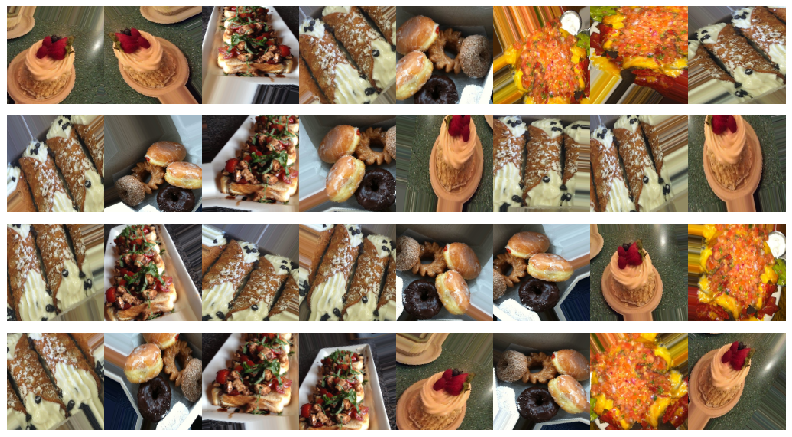

In [42]:
nrows = 4
ncols = 8
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(12, 8)
#fig.tight_layout()
imgs = np.random.choice(5, nrows * ncols)
for i, ax in enumerate(axes.flat):
    im = ax.imshow(train_generator[0][0][imgs[i]])
    ax.set_axis_off()
    ax.title.set_visible(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)
plt.subplots_adjust(left=0, wspace=0, hspace=0)
plt.show()

### 3.Training with ResNet50

#### 3.1 The first model consists of Basic ResNet50. 

In [ ]:
num_classes=101
base_model = ResNet50(
        weights='imagenet',
        include_top=False,
        input_tensor=Input(
            shape=(128,128,3)))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model_final = Model(inputs=base_model.input, outputs=predictions)

model_final.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_final.fit_generator(train_generator, validation_data=validation_generator,
                              epochs=5,steps_per_epoch=train_generator.samples//batch_size,
                              validation_steps=validation_generator.samples//batch_size)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
6312/6312 [==============================] - 3368s 534ms/step - loss: 4.5772 - acc: 0.0238 - val_loss: 4.8583 - val_acc: 0.0334
Epoch 2/100
6312/6312 [==============================] - 3251s 515ms/step - loss: 4.0099 - acc: 0.0913 - val_loss: 3.9916 - val_acc: 0.1032
Epoch 3/100
6312/6312 [==============================] - 3228s 511ms/step - loss: 3.5644 - acc: 0.1646 - val_loss: 3.4434 - val_acc: 0.1965
Epoch 4/100
6312/6312 [==============================] - 3224s 511ms/step - loss: 3.2441 - acc: 0.2266 - val_loss: 3.5423 - val_acc: 0.1938
Epoch 5/100
6312/6312 [==============================] - 3333s 528ms/step - loss: 3.0045 - acc: 0.2752 - val_loss: 2.8053 - val_acc: 0.3191
Epoch 6/100
6312/6312 [==============================] - 3443s 545ms/step - loss: 2.7972 - acc: 0.3185 - val_loss: 3.0420 - val_acc: 0.29

#### 3.2 A model with pretrained weights

In [14]:
num_classes=101
base_model = ResNet50(
        weights='imagenet',
        include_top=False,
        input_tensor=Input(
            shape=(128,128,3)))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)


for layer in base_model.layers:
    layer.trainable = False

model_final = Model(inputs=base_model.input, outputs=predictions)

model_final.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_final.fit_generator(train_generator, validation_data=validation_generator,
                              epochs=5,steps_per_epoch=train_generator.samples//batch_size,
                              validation_steps=validation_generator.samples//batch_size)


Epoch 1/5
6312/6312 [==============================] - 9431s 1s/step - loss: 4.2027 - acc: 0.1893 - val_loss: 5.3081 - val_acc: 0.0099
Epoch 2/5
6312/6312 [==============================] - 9362s 1s/step - loss: 4.2020 - acc: 0.2217 - val_loss: 5.3164 - val_acc: 0.0059
Epoch 3/5
6312/6312 [==============================] - 9294s 1s/step - loss: 4.2593 - acc: 0.2255 - val_loss: 5.8099 - val_acc: 0.0099
Epoch 4/5
6312/6312 [==============================] - 9231s 1s/step - loss: 4.2822 - acc: 0.2276 - val_loss: 5.9503 - val_acc: 0.0099
Epoch 5/5
6312/6312 [==============================] - 9215s 1s/step - loss: 4.2862 - acc: 0.2277 - val_loss: 5.6862 - val_acc: 0.0097


#### 3.3 Model with 249 layers of Non-trainable weights

In [ ]:
num_classes=101
base_model = ResNet50(
        weights='imagenet',
        include_top=False,
        input_tensor=Input(
            shape=(128,128,3)))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

model_final = Model(inputs=base_model.input, outputs=predictions)

model_final.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_final.fit_generator(train_generator, validation_data=validation_generator,
                              epochs=5,steps_per_epoch=train_generator.samples//batch_size,
                              validation_steps=validation_generator.samples//batch_size)
